In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [714]:
us_idx = pd.read_csv('US_indices.csv').T
us_idx.columns = us_idx.iloc[0]
us_idx = us_idx.iloc[1:]
us_idx 

eu_idx = pd.read_csv('EU_indices.csv').T
eu_idx.columns = eu_idx.iloc[0]
eu_idx = eu_idx.iloc[1:]
eu_idx 

index,SX5E,SX5T,SX6P,SX7E,SX7P,SX8P,SXAP,SXDP,SXEP,SXIP,SXKP,SXNP,SXPP,SXTP,SXXE,SXXP
1/1/1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/2/1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/3/1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/4/1999,0.0511681,0.0511681,0.0369638,0.0614431,0.0389777,0.00547373,0.0452673,0.0363424,0.020281,0.0446458,0.0666925,0.0177845,0.0178629,0.00721884,0.0523664,0.0349477
1/5/1999,0.00379803,0.00379803,0.00678476,0.0176707,0.0159604,-0.031021,-0.00770648,0.0251241,-0.00314552,0.0166518,0.0344569,0.00469753,-0.00548728,-0.0135246,0.0111448,0.0135461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/29/2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
05/30/2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
05/31/2021,-0.00722102,-0.00722102,-0.0127253,-0.00517232,-0.00488972,-0.00453352,-0.00210512,-0.00574626,-0.00573208,-0.0057302,-0.00624634,-0.00491089,0.000333733,0.00506073,-0.00570847,-0.00432539
06/01/2021,0.00795225,0.00795225,0.00284198,0.0159031,0.00904763,0.00504752,0.0252605,-0.00138543,0.0242823,0.00703202,0.00192161,0.0113889,0.031445,0.011581,0.00739277,0.00796433


In [715]:
def real_index_price(index_df):
    idx = index_df.copy()
    idx = (index_df + 1).cumprod()
    return idx

In [716]:
def real_index(index):
    adj_idx = pd.DataFrame()
    for idx in index:
        adj = real_index_price(index[idx])
        adj_idx = pd.concat([adj_idx, adj], axis = 1, join = 'outer')
    return adj_idx
    

In [717]:
adj_us_idx = real_index(us_idx)
adj_eu_idx = real_index(eu_idx)
all_indices = pd.concat([adj_us_idx, adj_eu_idx], axis = 1, join = 'outer')
all_indices

,S5AIRLX,S5AUCO,S5BANKX,S5COND,S5CONS,S5ENRS,S5ENRSX,S5FINL,S5HLTH,S5HOME,...,SXAP,SXDP,SXEP,SXIP,SXKP,SXNP,SXPP,SXTP,SXXE,SXXP
1/1/1999,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1/2/1999,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1/3/1999,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1/4/1999,1.00724,0.983882,1.00243,0.988694,0.989849,0.997936,0.997936,1.00715,0.990827,1.00499,...,1.04527,1.03634,1.02028,1.04465,1.06669,1.01778,1.01786,1.00722,1.05237,1.03495
1/5/1999,1.07253,1.01291,1.01313,0.998588,0.999232,0.989409,0.989409,1.0138,0.993207,1.00246,...,1.03721,1.06238,1.01707,1.06204,1.10345,1.02257,1.01228,0.993597,1.06409,1.04897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/29/2021,8.69088,8.76061,4.24559,73.3322,7.00575,4.74041,4.74041,10.0161,13.901,39.6506,...,4.72816,6.34661,3.28278,2.39085,2.18457,21.7283,23.8819,15.5034,8.53579,9.21853
05/30/2021,8.69088,8.76061,4.24559,73.3322,7.00575,4.74041,4.74041,10.0161,13.901,39.6506,...,4.72816,6.34661,3.28278,2.39085,2.18457,21.7283,23.8819,15.5034,8.53579,9.21853
05/31/2021,8.69088,8.76061,4.24559,73.3322,7.00575,4.74041,4.74041,10.0161,13.901,39.6506,...,4.71821,6.31014,3.26396,2.37715,2.17092,21.6216,23.8899,15.5819,8.48707,9.17866
06/01/2021,8.74652,8.78262,4.28686,73.228,6.98642,4.93094,4.93094,10.0862,13.6799,39.5271,...,4.83739,6.3014,3.34322,2.39387,2.1751,21.8679,24.6411,15.7623,8.54981,9.25176


In [718]:
all_indices.to_csv("Index_Prices.csv")

In [719]:

def build_bands_index(data, width = 2, lookback = 20): #builds the bollinger bands for every stock in index
    def build_bands(data, name, width, lookback): #gets bollinger bands value for single stock
        # width = 2
        # lookback = 20
        df = pd.DataFrame()
        df[name] = data[name]
        df[name + ' SMA'] = df[name].rolling(lookback).mean()
        df[name + ' UB'] = df[name + ' SMA'] + (df[name].rolling(lookback).std() * width) #upper band
        df[name + ' LB'] = df[name + ' SMA'] - (df[name].rolling(lookback).std() * width) #lower band
       # df[df[name] > df[name + 'UB']].astype(int) * -1 + df[df[name] < df[name + 'LB']].astype(int) 
        df[name + ' B%'] = (df[name] - df[name + ' LB']) / (df[name + ' UB'] - df[name + ' LB'] )
        return df

    df = pd.DataFrame()
    for name in data:
        index_band = build_bands(data, name, width, lookback)
        df = pd.concat([df, index_band], axis = 1, join = 'outer')
    return df

def get_index(data, index): #returns all columns with specific index
    return data.filter(regex = index)

def get_B_df(data): #B% vals columns only
    return data.filter(regex = "B%").fillna(0.5)

 

In [720]:
index_bands = build_bands_index(all_indices)
b_percents = get_B_df(index_bands)


In [721]:
def sort_B_pct(b_df): #returns list in ascending order of B% columns
    arr = np.argsort(b_df.values, axis=1)
    df1 = pd.DataFrame(b_df.columns[arr], index=b_df.index)
    return df1

def get_top_bot_five(data):
    b_vals = get_B_df(data)
    sorted_df = sort_B_pct(b_vals)
    
    top_five = sorted_df.iloc[:,-5:]
    bot_five = sorted_df.iloc[:,:5]
    df = pd.concat([bot_five, top_five], axis = 1, join = 'outer')
    df.columns = ['L1', 'L2', 'L3', 'L4', 'L5', 'T5', 'T4', 'T3', 'T2', 'T1']
    return df

In [722]:
top_ten = get_top_bot_five(index_bands)

In [723]:
def sector_bollinger_day(data, date):
    sectors = np.array(get_top_bot_five(data).loc[date].T)

    top_five_B = get_B_df(data).loc[date].nlargest(5)
    bot_five_B = get_B_df(data).loc[date].nsmallest(5)

    top_bot_B = np.array(pd.concat([bot_five_B, top_five_B.iloc[::-1]]))
    
    allocation = [.17,.13,.10,.07,.03,-.03,-.07,-.10,-.13,-.17]

    long_short = np.where(top_bot_B > 0.5, 'Short', 'Long')
    df = pd.DataFrame({'Sectors': sectors,
                       'B%': top_bot_B,
                       'Long/Short': long_short,
                       'Allocation': allocation})
    return df


In [724]:
sector_bollinger_day(index_bands, '01/01/2010')

,Sectors,B%,Long/Short,Allocation
0,S5PHARX B%,-0.054222,Long,0.17
1,S5UTIL B%,-0.037130,Long,0.13
2,S5INDU B%,0.109420,Long,0.10
3,S5CONS B%,0.282858,Long,0.07
4,S5HLTH B%,0.318310,Long,0.03
5,SXXE B%,0.737565,Short,-0.03
6,S5SSEQX B%,0.759045,Short,-0.07
7,SXNP B%,0.799296,Short,-0.10
8,SXPP B%,0.813140,Short,-0.13
9,SX6P B%,0.832592,Short,-0.17


In [725]:
def get_B_vals(data, arr, date):
    return data[arr].loc[date]

def dic_val(arr, date, long_bool): #array of indexes, date, long or short
    long_idx = arr
    long_B = list(get_B_vals(index_bands, long_idx, date))
    if(long_bool):
        alloc = [.17,.13,.10,.07,.03]
        return list(zip(long_idx, long_B, alloc))
    else:
        alloc = [-.03,-.07,-.10,-.13,-.17]
    return list(zip(long_idx, long_B, alloc))

    

In [726]:
def rebalance_day(data, date):
    overall_long_idx = list(sector_bollinger_day(data, date)['Sectors'].iloc[:5])
    overall_short_idx = list(sector_bollinger_day(data, date)['Sectors'].iloc[-5:])
    return dic_val(overall_long_idx, date, True) + dic_val(overall_short_idx, date, False)

def replace_sectors(init_arr, n_mask, n_replace_vals):#make sure replace vals are ordered in the way we want them to
    arr = init_arr.reset_index(drop=True)
    mask = n_mask.reset_index(drop=True)
    replace_vals = n_replace_vals.reset_index(drop=True)
    no_dups_replace_arr = replace_vals[~replace_vals.isin(arr[~mask])]
    arr[mask] = list(no_dups_replace_arr[:mask[mask].shape[0]])
    return arr

In [727]:
def construct_port(data, rebalance_freq, start_T):
    b_percents = get_B_df(data)
    b_percents_new = b_percents.loc[start_T:].iloc[1:]

    start_long_idx = list(sector_bollinger_day(data, start_T)['Sectors'].iloc[:5])
    start_short_idx = list(sector_bollinger_day(data, start_T)['Sectors'].iloc[-5:])
    
    port = {start_T: dic_val(start_long_idx, start_T, True) + dic_val(start_short_idx, start_T, False)}
    sorted_sectors = sort_B_pct(b_percents)
    yester_date = start_T
    
    freq_counter = 1
    for date, row in b_percents_new.iterrows():
        if(freq_counter % rebalance_freq == 0):
            port[date] = rebalance_day(data, date)
            
        else:   
            curr_vals = port[yester_date]

            curr_idxs, curr_Bs, curr_allocs = zip(*curr_vals)
            curr_idxs_ls = pd.Series(list(curr_idxs))

            long_idxs = curr_idxs_ls[:5]
            short_idxs = curr_idxs_ls[-5:]
            short_idxs = short_idxs[::-1]

            long_mask = (row[long_idxs] >= 0.5).reset_index(drop=True)
            short_mask = (row[short_idxs] <= 0.5).reset_index(drop=True)
            
            sorted_sectors_date = sorted_sectors.loc[date]
            replace_long_sectors = sorted_sectors_date[:10]
            replace_short_sectors = sorted_sectors_date[-10:]
            replace_short_sectors = replace_short_sectors[::-1]
            #long replacement

            new_long_idxs = replace_sectors(long_idxs, long_mask, replace_long_sectors)
            new_short_idxs = replace_sectors(short_idxs, short_mask, replace_short_sectors)[::-1]

            port[date] = dic_val(new_long_idxs, date, True) + dic_val(new_short_idxs, date, False)

        yester_date = date
        freq_counter = freq_counter + 1
    return port
    
def construct_port_no_reb(data, start_T):
    b_percents = get_B_df(data)
    b_percents_new = b_percents.loc[start_T:].iloc[1:]

    start_long_idx = list(sector_bollinger_day(data, start_T)['Sectors'].iloc[:5])
    start_short_idx = list(sector_bollinger_day(data, start_T)['Sectors'].iloc[-5:])
    
    port = {start_T: dic_val(start_long_idx, start_T, True) + dic_val(start_short_idx, start_T, False)}
    sorted_sectors = sort_B_pct(b_percents)
    yester_date = start_T
    
    freq_counter = 1
    for date, row in b_percents_new.iterrows():

        curr_vals = port[yester_date]

        curr_idxs, curr_Bs, curr_allocs = zip(*curr_vals)
        curr_idxs_ls = pd.Series(list(curr_idxs))

        long_idxs = curr_idxs_ls[:5]
        short_idxs = curr_idxs_ls[-5:]
        short_idxs = short_idxs[::-1]

        long_mask = (row[long_idxs] >= 0.5).reset_index(drop=True)
        short_mask = (row[short_idxs] <= 0.5).reset_index(drop=True)

        sorted_sectors_date = sorted_sectors.loc[date]
        replace_long_sectors = sorted_sectors_date[:10]
        replace_short_sectors = sorted_sectors_date[-10:]
        replace_short_sectors = replace_short_sectors[::-1]
        #long replacement

        new_long_idxs = replace_sectors(long_idxs, long_mask, replace_long_sectors)
        new_short_idxs = replace_sectors(short_idxs, short_mask, replace_short_sectors)[::-1]

        port[date] = dic_val(new_long_idxs, date, True) + dic_val(new_short_idxs, date, False)

        yester_date = date
        freq_counter = freq_counter + 1
    return port
    
%time  

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [728]:
%%time
port = construct_port(index_bands, 7, '01/01/2010') #weekly rebalance
port

CPU times: user 3min 27s, sys: 19.7 s, total: 3min 47s
Wall time: 3min 53s


{'01/01/2010': [('S5PHARX B%', -0.054222108206700925, 0.17),
  ('S5UTIL B%', -0.0371301799068937, 0.13),
  ('S5INDU B%', 0.10941996513633512, 0.1),
  ('S5CONS B%', 0.28285791612156885, 0.07),
  ('S5HLTH B%', 0.3183098746631737, 0.03),
  ('SXXE B%', 0.7375652622619616, -0.03),
  ('S5SSEQX B%', 0.7590445814779283, -0.07),
  ('SXNP B%', 0.7992961042128097, -0.1),
  ('SXPP B%', 0.8131402778509932, -0.13),
  ('SX6P B%', 0.832591580081749, -0.17)],
 '01/02/2010': [('S5PHARX B%', 0.014808907730180707, 0.17),
  ('S5UTIL B%', 0.035760336427711495, 0.13),
  ('S5INDU B%', 0.14688050242046438, 0.1),
  ('S5CONS B%', 0.30387637879853985, 0.07),
  ('S5HLTH B%', 0.3086901791018329, 0.03),
  ('SXXE B%', 0.7176284014635532, -0.03),
  ('S5SSEQX B%', 0.7346519225478364, -0.07),
  ('SXNP B%', 0.7756237557829058, -0.1),
  ('SXPP B%', 0.7862022763592088, -0.13),
  ('SX6P B%', 0.8015560737486139, -0.17)],
 '01/03/2010': [('S5PHARX B%', 0.07801676015278505, 0.17),
  ('S5UTIL B%', 0.07614428278437434, 0.13),
  

In [729]:
port2 = construct_port_no_reb(index_bands, '01/01/2010')
port2

{'01/01/2010': [('S5PHARX B%', -0.054222108206700925, 0.17),
  ('S5UTIL B%', -0.0371301799068937, 0.13),
  ('S5INDU B%', 0.10941996513633512, 0.1),
  ('S5CONS B%', 0.28285791612156885, 0.07),
  ('S5HLTH B%', 0.3183098746631737, 0.03),
  ('SXXE B%', 0.7375652622619616, -0.03),
  ('S5SSEQX B%', 0.7590445814779283, -0.07),
  ('SXNP B%', 0.7992961042128097, -0.1),
  ('SXPP B%', 0.8131402778509932, -0.13),
  ('SX6P B%', 0.832591580081749, -0.17)],
 '01/02/2010': [('S5PHARX B%', 0.014808907730180707, 0.17),
  ('S5UTIL B%', 0.035760336427711495, 0.13),
  ('S5INDU B%', 0.14688050242046438, 0.1),
  ('S5CONS B%', 0.30387637879853985, 0.07),
  ('S5HLTH B%', 0.3086901791018329, 0.03),
  ('SXXE B%', 0.7176284014635532, -0.03),
  ('S5SSEQX B%', 0.7346519225478364, -0.07),
  ('SXNP B%', 0.7756237557829058, -0.1),
  ('SXPP B%', 0.7862022763592088, -0.13),
  ('SX6P B%', 0.8015560737486139, -0.17)],
 '01/03/2010': [('S5PHARX B%', 0.07801676015278505, 0.17),
  ('S5UTIL B%', 0.07614428278437434, 0.13),
  

In [730]:
def get_day_pos_port(port, date):
    df = pd.DataFrame(port[date])
    df.columns = ['Sectors', 'B%', 'Allocation']
    return df


In [731]:
example = get_day_pos_port(port, '01/01/2021')

In [732]:
port_df = pd.DataFrame(port).T
port_df.to_csv("Bands_Portfolio_Wkly_Rebalance.csv")

In [733]:
port2_df = pd.DataFrame(port2).T
port2_df.to_csv("Bands_Portfolio_No_Rebalance.csv")

In [734]:
new_port = {}
for k,v in port.items():
    new_port[k] = [t[i] for t in v for i in [0,2]]
alloc_df = pd.DataFrame(new_port).T
alloc_df.columns = [x for i in range(1,11) for x in ['Sector ' + str(i), 'Allocation ' + str(i)]]
test1 = alloc_df[['Sector 1', 'Allocation 1']]

pos_df = pd.DataFrame() 

for i in range(1,11):
    sec_name = 'Sector ' + str(i)
    alloc_name = 'Allocation ' + str(i)
    sectori = alloc_df[[sec_name, alloc_name]].pivot(columns = sec_name, values = alloc_name).fillna(0)
    pos_df = sectori.add(pos_df, fill_value = 0)

index_prices = all_indices
pos_df = pd.concat([index_prices, pos_df], axis = 1, join = 'outer').sort_index(axis = 1).fillna(0)
idx_cols = all_indices.columns

for idx in idx_cols:
    pos_df[idx + '|P&L'] = pos_df[idx].diff(periods = -1) * -1 / pos_df[idx] * pos_df[idx + ' B%'] 
    #(tomorrows price - todays price) / todays price * our position allocation today = P&L for the day
    
pos_df['Total P&L'] = pos_df.filter(regex = 'P&L').sum(axis = 1)
pos_df['Cumulative P&L'] = pos_df['Total P&L'].cumsum()

In [735]:
pos_df.index = pd.to_datetime(pos_df.index)
pos_df

,S5AIRLX,S5AIRLX B%,S5AUCO,S5AUCO B%,S5BANKX,S5BANKX B%,S5COND,S5COND B%,S5CONS,S5CONS B%,...,SXEP|P&L,SXIP|P&L,SXKP|P&L,SXNP|P&L,SXPP|P&L,SXTP|P&L,SXXE|P&L,SXXP|P&L,Total P&L,Cumulative P&L
1999-01-01,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.00,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0,0.000000,0.000000
1999-01-02,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.00,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0,0.000000,0.000000
1999-01-03,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1999-01-04,1.007241,0.0,0.983882,0.0,1.002432,0.0,0.988694,0.0,0.989849,0.00,...,-0.0,0.0,0.0,0.000000,-0.0,-0.0,0.000000,0.0,0.000000,0.000000
1999-01-05,1.072527,0.0,1.012908,0.0,1.013133,0.0,0.998588,0.0,0.999232,0.00,...,-0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-29,8.690882,0.0,8.760613,0.0,4.245590,0.0,73.332202,0.0,7.005747,0.00,...,-0.0,-0.0,-0.0,0.000000,-0.0,-0.0,0.000000,-0.0,0.000000,0.298803
2021-05-30,8.690882,0.0,8.760613,0.0,4.245590,0.0,73.332202,0.0,7.005747,0.00,...,-0.0,-0.0,-0.0,0.000835,0.0,0.0,0.000742,-0.0,0.002951,0.301754
2021-05-31,8.690882,0.0,8.760613,0.0,4.245590,0.0,73.332202,0.0,7.005747,0.00,...,0.0,0.0,0.0,-0.001936,0.0,0.0,-0.000961,0.0,-0.003432,0.298321
2021-06-01,8.746517,0.0,8.782622,0.0,4.286864,0.0,73.228020,0.0,6.986416,0.03,...,0.0,-0.0,0.0,-0.000535,0.0,-0.0,-0.000298,0.0,0.000063,0.298384


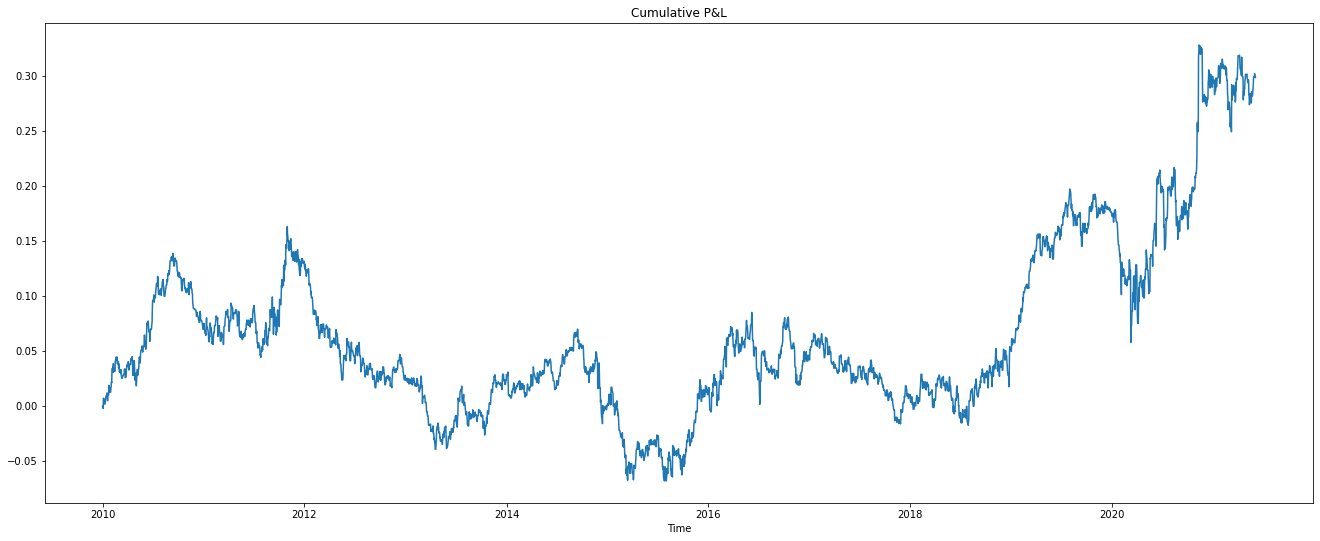

In [736]:
fig = plt.figure(figsize=(50,30)) #overall plot size
ax4 = fig.add_subplot(324)


ax4.plot(pos_df.loc['01/01/2010':]['Total P&L'].cumsum()) #note: we use cumsum here to see *cumulative* profit
ax4.set_title("Cumulative P&L")

plt.xlabel("Time")
plt.show()